In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem 1

In [2]:
data = pd.read_csv('bank_marketing_part1_Data-1.csv')

### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [58]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [59]:
data.shape

(210, 7)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [61]:
data.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [63]:
data.duplicated().sum()

0

* The variables have no null values
* The Dataset has 210 observations and 7 variables of Float data type 
* There are no duplicates in the dataset

### 1.2 Do you think scaling is necessary for clustering in this case?

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
X = StandardScaler()

In [5]:
scaled_data = X.fit_transform(data)

In [67]:
scaled_data

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

* Yes, Scaling is necessary and has been applied to this data as the observations are of varying scales which may affect the results of clustering 

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
link_method = linkage(scaled_data, method = 'average')

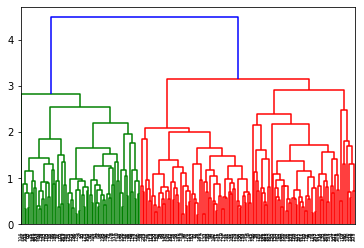

In [70]:
dend = dendrogram(link_method)

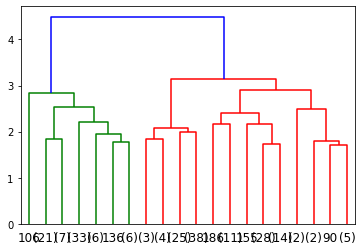

In [8]:
end = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 20,
                 )

In [9]:
from scipy.cluster.hierarchy import fcluster

In [10]:
clusters = fcluster(link_method, 2, criterion='maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1], dtype=int32)

In [11]:
data['clusters'] = clusters

In [75]:
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [76]:
data.clusters.value_counts().sort_index()

1     75
2    135
Name: clusters, dtype: int64

In [77]:
aggdata=data.groupby('clusters').mean()
aggdata['Freq']=data.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.12920,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,13.02437,13.726667,0.865112,5.346748,3.042207,3.727979,5.086422,135


* Hierarchical clustering was applied and 2 was identified as the optimum number of clusters 
* Cluster 1 contains observations of high credit card usage 
* cluster 2 contains observations of low credit card usage 

### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [12]:
from sklearn.cluster import KMeans 

In [13]:
k_means = KMeans(n_clusters = 2)

In [14]:
k_means.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [81]:
k_means.labels_

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

In [82]:
k_means.inertia_

659.1717544870407

In [83]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_data)
k_means.inertia_

430.65897315130053

In [84]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_data)
k_means.inertia_

371.65314399951626

In [85]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_data)
k_means.inertia_

1470.0

In [86]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_data)
k_means.inertia_

327.44250470083705

In [15]:
wss =[]

In [16]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

In [89]:
wss

[1470.0,
 659.1717544870407,
 430.65897315130053,
 371.1846125351019,
 328.21750906266783,
 289.420298397092,
 262.8069839396836,
 240.68737321406962,
 224.36355608278583,
 207.08667067008432]

In [90]:
import matplotlib.pyplot as plt

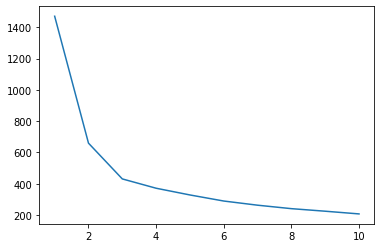

In [91]:
plt.plot(range(1,11), wss)

In [17]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_data)
labels = k_means.labels_

In [18]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [94]:
silhouette_score(scaled_data,labels)

0.4007270552751299

In [19]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(scaled_data)
labels = k_means.labels_

In [96]:
silhouette_score(scaled_data,labels)

0.46577247686580914

In [15]:
data["Clus_kmeans2"] = labels
data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans2
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [16]:
data.Clus_kmeans2.value_counts().sort_index()

0    133
1     77
Name: Clus_kmeans2, dtype: int64

In [17]:
clust_profile=data.groupby('Clus_kmeans2').mean()
clust_profile['freq']=data.Clus_kmeans2.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_kmeans2,,,,,,,,
0,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,133
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77


* the optimum number of clusters has been identified as 2 using elbow curve and silhouette score
* Cluster 1 consists of high Credit card usage 
* Cluster 2 consists of Low Credit card usage 

### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

#### Hierarchical Clustering 

* Cluster 1 : High Credit Card Usage (spending high, larger credit limit and current balance)
* cluster 2 : Low credit card usage ( spending, payment, current balance are all relatively low) 

#### K Means Clustering 

* Cluster 1 : Low Credit Card Usage (except for Minimum payment amount all others are low)
* Cluster 2 : high credit card usage ( all the variables are high except for minimum payment amount) 

## Recommendations 

1. Customers in Low credit Card usage can be offered promotions which require smaller credit limit and spending  
2. Customers in High Credit Card usage can be offered promotions which are high spending and needs  a larger credit limit   

# Problem 2 

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. 

In [20]:
df=pd.read_csv('insurance_part2_data.csv')

In [10]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [12]:
df.shape

(3000, 10)

In [4]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [21]:
df.drop_duplicates(inplace=True)

In [6]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


* duplicates have been dropped 

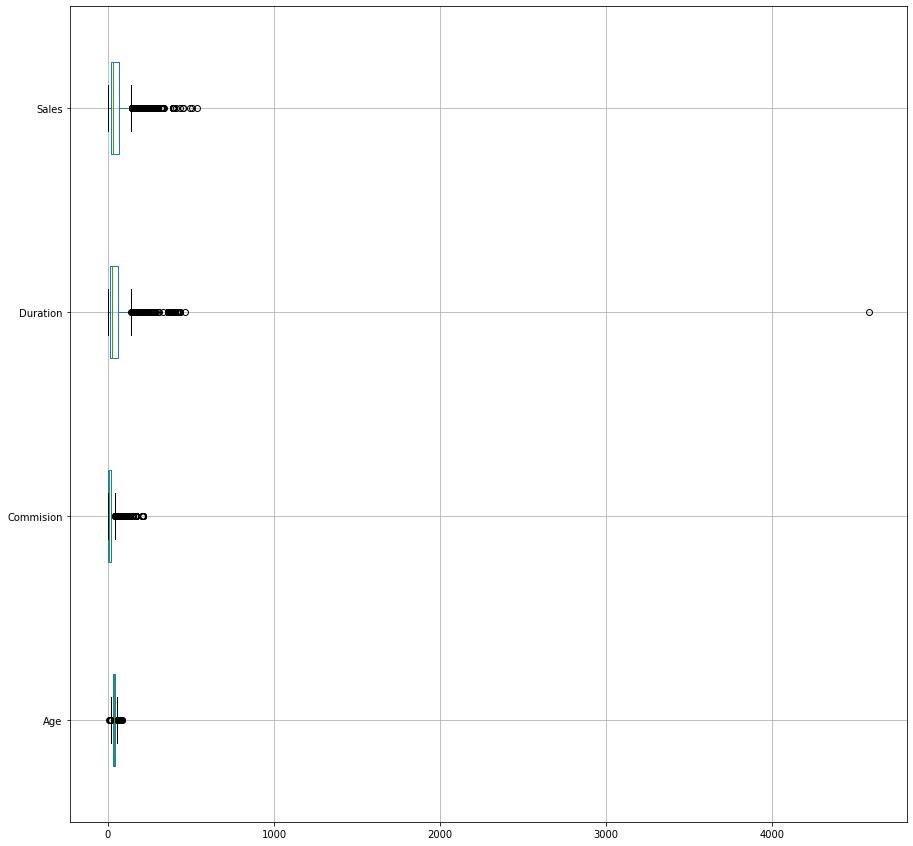

In [15]:
plt.figure(figsize=(15,15))
df[['Age', 'Commision', 'Duration', 'Sales']].boxplot(vert=0)

* The dataset contains many outliers. CART and Random Forest are not sensitive to outliers but Artificial Neural Networks are sensitive. Since the outliers are not too far out it may not affect ANN 

In [16]:
df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


#### Mean
* Age: 38
* Commision: 14.5 
* Duration: 70
* Sales: 60.2

#### Median 
* Age: 36
* Commision: 4.63
* Duration: 26.5
* Sales: 33


In [18]:
df.mode()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,36,EPX,Travel Agency,No,0.0,Online,8,20.0,Customised Plan,ASIA


#### Mode 
* Age: 36
* Commision: 0
* Duration: 8
* Sales: 20

In [17]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

* There are no null values in the dataset 
* The most common age of the user is 36, common destination is Asia 
* Sales and Commision Varies alot 

In [22]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


* Object type variables have been converted to categorical 

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [23]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [27]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

#### CART

In [28]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,30,50], 
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450], 
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [29]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=300,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### ROC and AUC for training data

AUC: 0.810


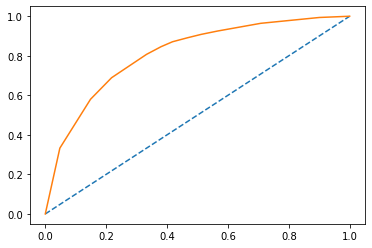

In [31]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr)

### ROC and AUC for test data 

AUC: 0.792


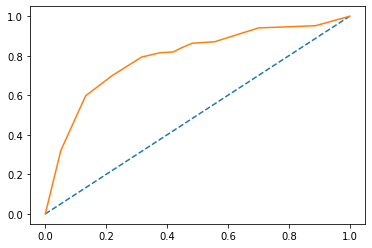

In [32]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

### Accuracy,Confusion Matrix and Classification Report  for training data 

In [33]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7642357642357642

In [34]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1359
           1       0.65      0.58      0.61       643

    accuracy                           0.76      2002
   macro avg       0.73      0.72      0.72      2002
weighted avg       0.76      0.76      0.76      2002



In [35]:
confusion_matrix(train_labels, ytrain_predict)

array([[1157,  202],
       [ 270,  373]], dtype=int64)

### Accuracy,Confusion Matrix and Classification Report for test data

In [36]:
confusion_matrix(test_labels, ytest_predict)

array([[510,  78],
       [109, 162]], dtype=int64)

In [37]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       588
           1       0.68      0.60      0.63       271

    accuracy                           0.78       859
   macro avg       0.75      0.73      0.74       859
weighted avg       0.78      0.78      0.78       859



In [38]:
cart_test_acc=best_grid.score(X_test,test_labels) 
cart_test_acc

0.7823050058207218

## Performance 

#### Training Data
* AUC: 81%
* Accuracy: 76%
* Sensitivity: 58%
* precision: 65%
* f1-score: 61%

#### Test Data
* AUC: 79%
* Accuracy: 78%
* Sensitivity: 60% 
* Precision: 68% 
* f1-Score: 63% 

Training and Test set results are nearly similar indicating no overfitting or underfitting, overall measures are moderate but good enough to predict 

#### Random Forest 

In [39]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4,6],
    'min_samples_leaf': [50,100],
    'min_samples_split': [150,300],
    'n_estimators': [300,500]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [ ]:
grid_search.fit(X_train, train_labels)

In [24]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 500}

In [25]:
best_grid = grid_search.best_estimator_

In [26]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Confusion Matrix, Accuracy, Classification Report,ROC and AUC  for Training Data

In [27]:
confusion_matrix(train_labels,ytrain_predict)

array([[1200,  159],
       [ 303,  340]], dtype=int64)

In [28]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7692307692307693

In [29]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1359
           1       0.68      0.53      0.60       643

    accuracy                           0.77      2002
   macro avg       0.74      0.71      0.72      2002
weighted avg       0.76      0.77      0.76      2002



Area under Curve is 0.7058867958211885


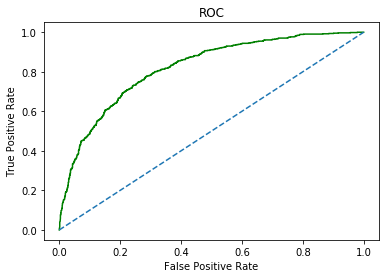

In [30]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

### Confusion Matrix, Accuracy, Classification Report,ROC and AUC for Test Data

In [31]:
confusion_matrix(test_labels,ytest_predict)

array([[524,  64],
       [130, 141]], dtype=int64)

In [32]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7741559953434226

In [33]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       588
           1       0.69      0.52      0.59       271

    accuracy                           0.77       859
   macro avg       0.74      0.71      0.72       859
weighted avg       0.77      0.77      0.76       859



Area under Curve is 0.7057258327685316


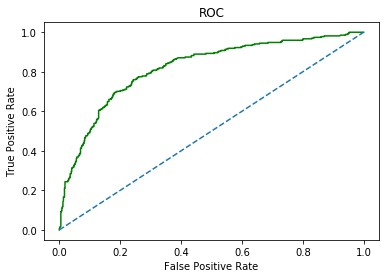

In [34]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

## Performance 

#### Train Data:
* AUC: 70%
* Accuracy: 77%
* Sensitivity: 53%
* Precision: 68%
* f1-Score: 60%

#### Test Data:
* AUC: 70%
* Accuracy: 77%
* Sensitivity: 52%
* Precision: 69%
* f1-Score: 59%

Training and Test set results are nearly similar, overall measures are moderate, but good enough for predictions 

### Neural Networks 

In [35]:
x = StandardScaler()

In [36]:
X_train = x.fit_transform(X_train)

In [38]:
X_test = x.transform(X_test)

In [39]:
param_grid = {
    'hidden_layer_sizes': [100,300,500], 
    'max_iter': [5000,2500,7000], 
    'solver': ['sgd','adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier()

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [42]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [100, 300, 500],
 

In [43]:
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 7000, 'solver': 'adam', 'tol': 0.01}

In [44]:
best_grid = grid_search.best_estimator_

In [45]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

### Confusion Matrix, Accuracy, Classification Report, ROC and AUC for Training data

In [46]:
confusion_matrix(train_labels,ytrain_predict)

array([[1193,  166],
       [ 325,  318]], dtype=int64)

In [47]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7547452547452548

In [48]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1359
           1       0.66      0.49      0.56       643

    accuracy                           0.75      2002
   macro avg       0.72      0.69      0.70      2002
weighted avg       0.74      0.75      0.74      2002



Area under Curve is 0.6862040632291835


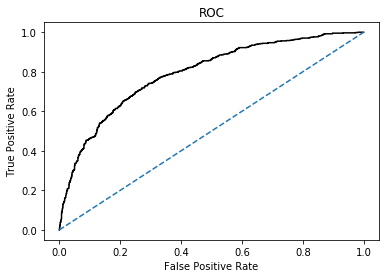

In [49]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

### Confusion Matrix, Accuracy, Classification Report, ROC and AUC for Test data

In [50]:
confusion_matrix(test_labels,ytest_predict)

array([[529,  59],
       [133, 138]], dtype=int64)

In [51]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7764842840512224

In [52]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.70      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.70      0.72       859
weighted avg       0.77      0.78      0.77       859



Area under Curve is 0.7044424780982503


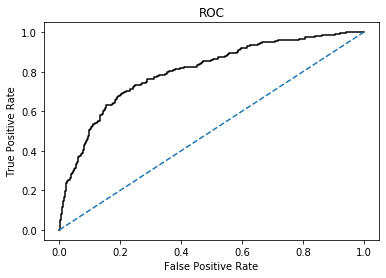

In [53]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

## Performance 

#### Training Data
* AUC: 69%
* Accuracy: 75%
* Sensitivity: 49%
* precision: 66%
* f1-score: 56%

#### Test Data
* AUC: 70%
* Accuracy: 78%
* Sensitivity: 51% 
* Precision: 70% 
* f1-Score: 59% 

Training and Test set results are almost similar, overall measures are moderate but good for predictions 

## 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

#### Training Data 

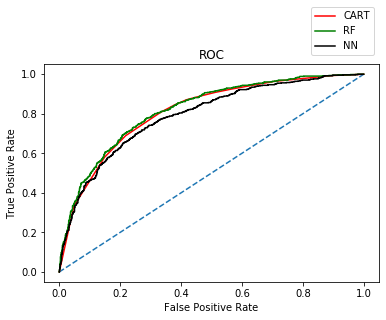

In [55]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### Test Data 

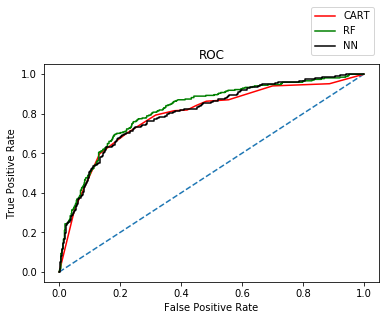

In [56]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

Random Forest has better performance when compared with CART and Neural network 